In [2]:
import csv
import numpy as np
from matplotlib import pyplot
from pylab import rcParams
from sklearn import linear_model
from sklearn.model_selection import cross_validate
import pandas as pd
import datetime as dt
import math
import sys
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#read a file
#インデックスをTIMESTANPに設定し，時系列データとして読み込む(index_col='TIMESTAMP', parse_dates=True)
df01 = pd.read_csv('logger1_2018-03-13_2018-12-16_every1min_withoutRainfall_WL_Velocity.csv', index_col='TIMESTAMP', parse_dates=True)
df02 = pd.read_csv('logger2_2018-03-13_2018-12-16_every1min_withoutRainfall_WL_Velocity.csv', index_col='TIMESTAMP', parse_dates=True)
df03 = pd.read_csv('logger3_2018-03-20_2018-12-16_every1min_withoutRainfall_WL_Velocity.csv', index_col='TIMESTAMP', parse_dates=True)
df04 = pd.read_csv('Precipitation_WL_Velocity201801to201812_every_1min.csv', index_col='TIMESTAMP', parse_dates=True)
# print(df01,df02,df03,df04)

In [6]:
df_all = pd.concat([df01, df02, df03, df04], axis=1,sort=False)

#Load_Avgの差分をとる
df_all['Load_Avg_difference'] = df_all['Load_Avg'].diff()

#NaNデータを削除
df_all = df_all.dropna(how='any')



# #df_all_1.columnsを全部表示させるようにする
# pd.options.display.max_seq_items = 200

# print(df_all_1.columns)


# #重複した列を削除(WLなど)
# df_all_2 = df_all_1.loc[:,~df_all_1.columns.duplicated()]
# # df_all_1.drop_duplicates()

# print(df_all_2.columns)

# #pd.options.display.max_seq_itemsを元にもどす(初期値が２０だった)
# pd.options.display.max_seq_items = 20

In [12]:
def histgram_of_Load_Avg_difference(df, num_bins=100, nums_range=(-10,10)):
    # グラフが見きれないようにするためサイズを大きくしておく
    rcParams['figure.figsize'] = 5, 5
    # ヒストグラムを描画する(一括の時は単純にdf.hist())
    df['Load_Avg_difference'].hist(bins=num_bins,range=nums_range)
    # グラフ同士が重ならないようにする関数
    plt.tight_layout()
    # グラフの表示
    plt.show()
    
# histgram_of_Load_Avg_difference(df_all_LAD)

In [9]:
#event No. 1: 2018年4月15日 0:00－16日 0:00
#event No. 2: 2018年4月24日18:00－25日18:00 
#event No. 3: 2018年6月28日 6:00－16日18:00 
#event No. 4: 2018年9月 8日 0:00－16日12:00  
#event No. 5: 2018年9月30日21:00－10月1日3:00

df_event_no1 = df_all['2018-04-15 0:00' : '2018-04-16 0:00']
df_event_no2 = df_all['2018-04-24 18:00' : '2018-04-25 18:00']
df_event_no3 = df_all['2018-06-28 6:00' : '2018-06-28 18:00']
df_event_no4 = df_all['2018-09-08 0:00' : '2018-09-16 12:00']
df_event_no5 = df_all['2018-09-30 21:00' : '2018-10-1 3:00']

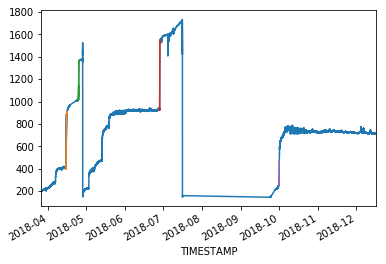

In [14]:
df_all['Load_Avg'].plot()
df_event_no1['Load_Avg'].plot()
df_event_no2['Load_Avg'].plot()
df_event_no3['Load_Avg'].plot()
# df_event_no4['Load_Avg'].plot()
df_event_no5['Load_Avg'].plot()
plt.show()

In [79]:
def mean_every_xmin(df, x):
    """
    x：the value you wanna take an average of
    """
    df_mean = df.asfreq('{}T'.format(x))
    return df_mean
    
df_event_no1_10min = mean_every_xmin(df_event_no1, 10)
df_event_no1_20min = mean_every_xmin(df_event_no1, 20)
df_event_no1_30min = mean_every_xmin(df_event_no1, 30)
df_event_no1_40min = mean_every_xmin(df_event_no1, 40)
df_event_no1_50min = mean_every_xmin(df_event_no1, 50)
df_event_no1_60min = mean_every_xmin(df_event_no1, 60)
df_event_no1_70min = mean_every_xmin(df_event_no1, 70)
df_event_no1_80min = mean_every_xmin(df_event_no1, 80)
df_event_no1_90min = mean_every_xmin(df_event_no1, 90)

df_event_no2_10min = mean_every_xmin(df_event_no2, 10)
df_event_no2_20min = mean_every_xmin(df_event_no2, 20)
df_event_no2_30min = mean_every_xmin(df_event_no2, 30)
df_event_no2_40min = mean_every_xmin(df_event_no2, 40)
df_event_no2_50min = mean_every_xmin(df_event_no2, 50)
df_event_no2_60min = mean_every_xmin(df_event_no2, 60)
df_event_no2_70min = mean_every_xmin(df_event_no2, 70)
df_event_no2_80min = mean_every_xmin(df_event_no2, 80)
df_event_no2_90min = mean_every_xmin(df_event_no2, 90)

df_event_no3_10min = mean_every_xmin(df_event_no3, 10)
df_event_no3_20min = mean_every_xmin(df_event_no3, 20)
df_event_no3_30min = mean_every_xmin(df_event_no3, 30)
df_event_no3_40min = mean_every_xmin(df_event_no3, 40)
df_event_no3_50min = mean_every_xmin(df_event_no3, 50)
df_event_no3_60min = mean_every_xmin(df_event_no3, 60)
df_event_no3_70min = mean_every_xmin(df_event_no3, 70)
df_event_no3_80min = mean_every_xmin(df_event_no3, 80)
df_event_no3_90min = mean_every_xmin(df_event_no3, 90)

df_event_no4_10min = mean_every_xmin(df_event_no4, 10)
df_event_no4_20min = mean_every_xmin(df_event_no4, 20)
df_event_no4_30min = mean_every_xmin(df_event_no4, 30)
df_event_no4_40min = mean_every_xmin(df_event_no4, 40)
df_event_no4_50min = mean_every_xmin(df_event_no4, 50)
df_event_no4_60min = mean_every_xmin(df_event_no4, 60)
df_event_no4_70min = mean_every_xmin(df_event_no4, 70)
df_event_no4_80min = mean_every_xmin(df_event_no4, 80)
df_event_no4_90min = mean_every_xmin(df_event_no4, 90)
df_event_no4_180min = mean_every_xmin(df_event_no4, 180)
df_event_no4_360min = mean_every_xmin(df_event_no4, 360)
df_event_no4_720min = mean_every_xmin(df_event_no4, 720)


df_event_no5_10min = mean_every_xmin(df_event_no5, 10)
df_event_no5_20min = mean_every_xmin(df_event_no5, 20)
df_event_no5_30min = mean_every_xmin(df_event_no5, 30)
df_event_no5_40min = mean_every_xmin(df_event_no5, 40)
df_event_no5_50min = mean_every_xmin(df_event_no5, 50)
df_event_no5_60min = mean_every_xmin(df_event_no5, 60)
df_event_no5_70min = mean_every_xmin(df_event_no5, 70)
df_event_no5_80min = mean_every_xmin(df_event_no5, 80)
df_event_no5_90min = mean_every_xmin(df_event_no5, 90)

In [70]:
def scatter_graph_in_df(df, x_name, y_name, x_range=(-500,500), y_range=(-100,500)):
    '''
    df :　DetaFrame
    x_name：ｘ軸に用いるパラメータの名前(str)
    y_name：ｙ軸に用いるパラメータの名前(str)
    '''
    # 「散布図行列」を作成する。散布図行列を利用すれば、データセットの特徴量のペアに対す
    # る相関関係を1 つの平面上で可視化可能
    # Notebook出力には次の１行が必要
    a, b = x_range
    c, d = y_range
    %matplotlib inline
    # Plot the data you select
    plt.figure(figsize=(8, 6))

    plt.scatter(df[x_name], df[y_name])
    plt.xlim(a, b)
    plt.ylim(c, d)
    

    plt.show()    

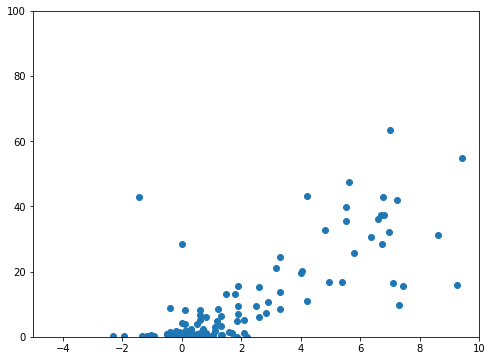

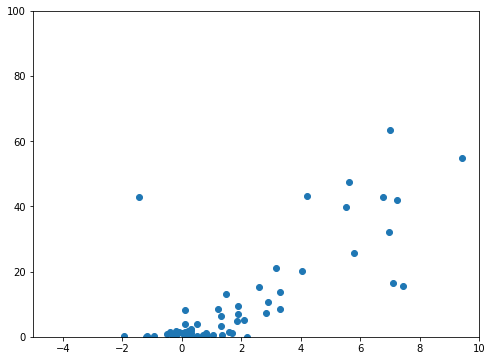

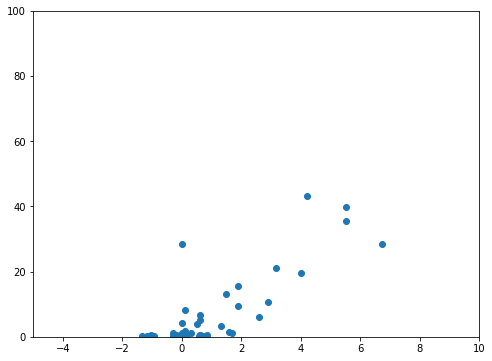

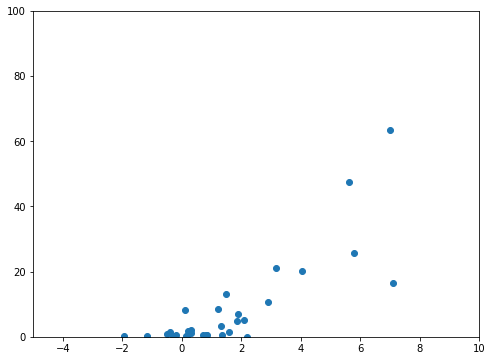

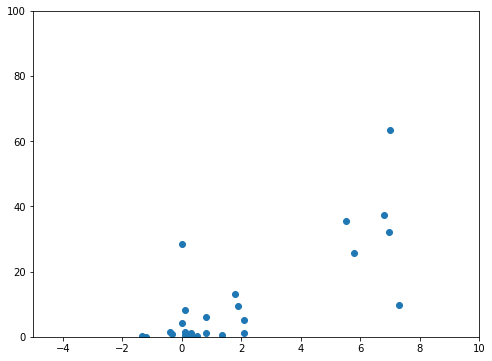

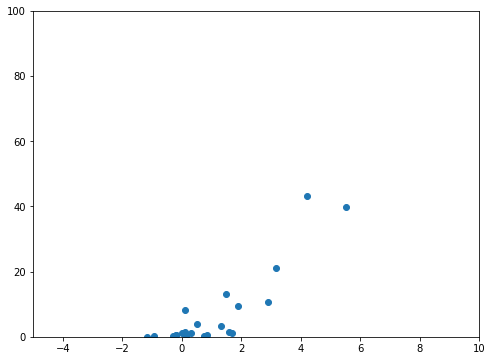

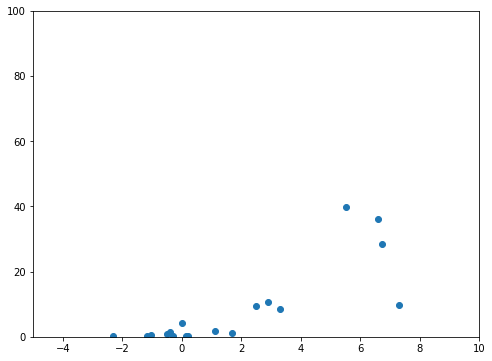

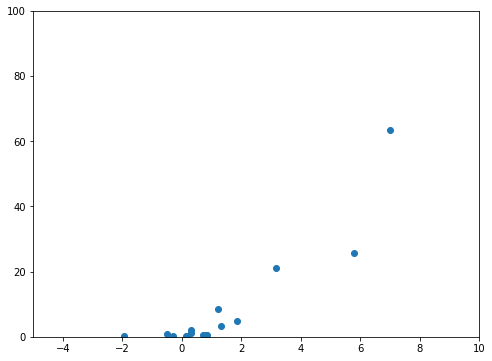

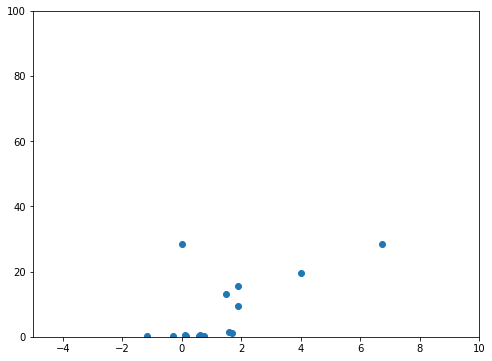

In [75]:
scatter_graph_in_df(df_event_no1_10min, 'Load_Avg_difference', 'hp_Tot(6)',x_range=(-5,10),y_range=(0,100))
scatter_graph_in_df(df_event_no1_20min, 'Load_Avg_difference', 'hp_Tot(6)',x_range=(-5,10),y_range=(0,100))
scatter_graph_in_df(df_event_no1_30min, 'Load_Avg_difference', 'hp_Tot(6)',x_range=(-5,10),y_range=(0,100))
scatter_graph_in_df(df_event_no1_40min, 'Load_Avg_difference', 'hp_Tot(6)',x_range=(-5,10),y_range=(0,100))
scatter_graph_in_df(df_event_no1_50min, 'Load_Avg_difference', 'hp_Tot(6)',x_range=(-5,10),y_range=(0,100))
scatter_graph_in_df(df_event_no1_60min, 'Load_Avg_difference', 'hp_Tot(6)',x_range=(-5,10),y_range=(0,100))
scatter_graph_in_df(df_event_no1_70min, 'Load_Avg_difference', 'hp_Tot(6)',x_range=(-5,10),y_range=(0,100))
scatter_graph_in_df(df_event_no1_80min, 'Load_Avg_difference', 'hp_Tot(6)',x_range=(-5,10),y_range=(0,100))
scatter_graph_in_df(df_event_no1_90min, 'Load_Avg_difference', 'hp_Tot(6)',x_range=(-5,10),y_range=(0,100))


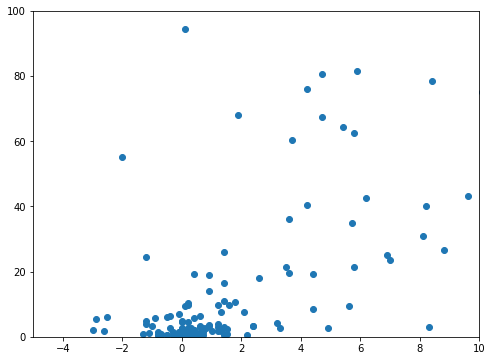

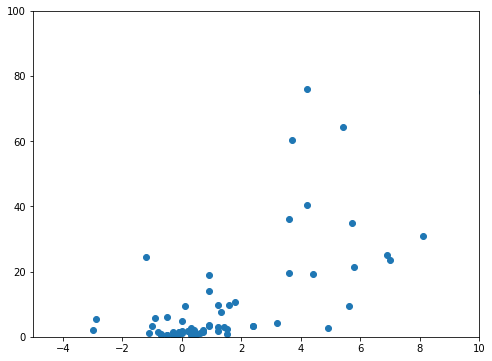

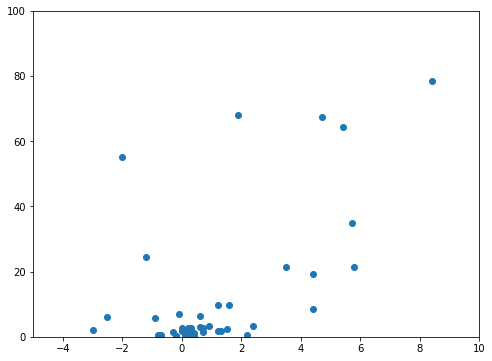

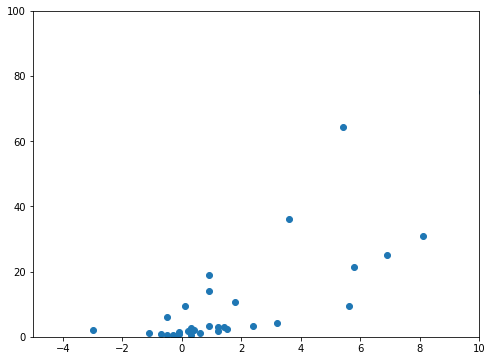

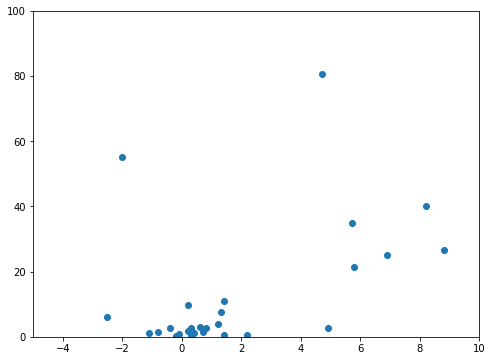

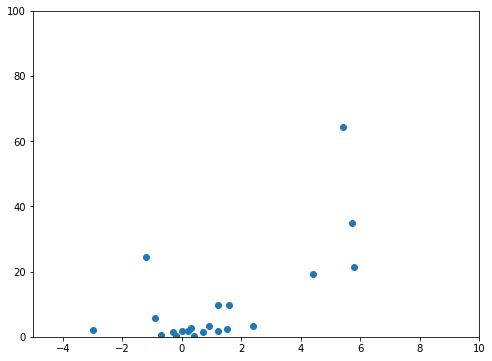

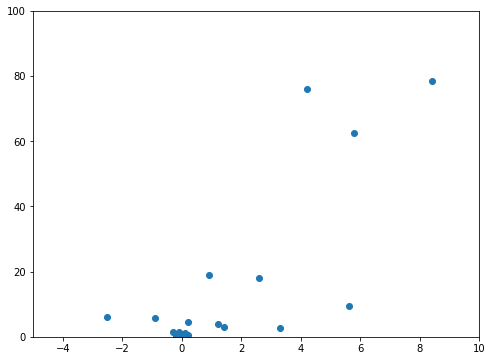

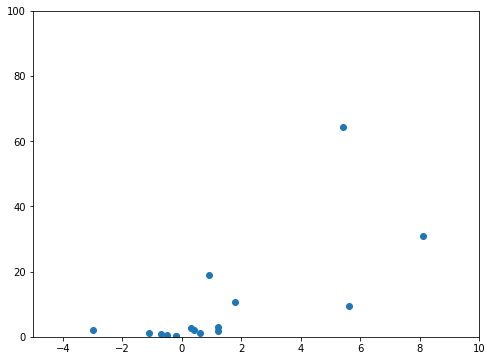

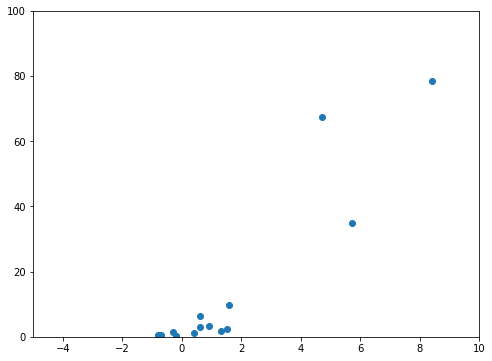

In [76]:
scatter_graph_in_df(df_event_no2_10min, 'Load_Avg_difference', 'hp_Tot(6)',x_range=(-5,10),y_range=(0,100))
scatter_graph_in_df(df_event_no2_20min, 'Load_Avg_difference', 'hp_Tot(6)',x_range=(-5,10),y_range=(0,100))
scatter_graph_in_df(df_event_no2_30min, 'Load_Avg_difference', 'hp_Tot(6)',x_range=(-5,10),y_range=(0,100))
scatter_graph_in_df(df_event_no2_40min, 'Load_Avg_difference', 'hp_Tot(6)',x_range=(-5,10),y_range=(0,100))
scatter_graph_in_df(df_event_no2_50min, 'Load_Avg_difference', 'hp_Tot(6)',x_range=(-5,10),y_range=(0,100))
scatter_graph_in_df(df_event_no2_60min, 'Load_Avg_difference', 'hp_Tot(6)',x_range=(-5,10),y_range=(0,100))
scatter_graph_in_df(df_event_no2_70min, 'Load_Avg_difference', 'hp_Tot(6)',x_range=(-5,10),y_range=(0,100))
scatter_graph_in_df(df_event_no2_80min, 'Load_Avg_difference', 'hp_Tot(6)',x_range=(-5,10),y_range=(0,100))
scatter_graph_in_df(df_event_no2_90min, 'Load_Avg_difference', 'hp_Tot(6)',x_range=(-5,10),y_range=(0,100))

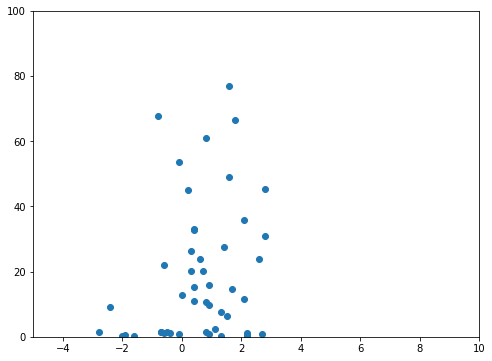

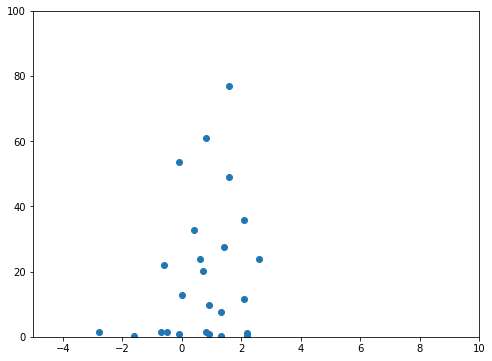

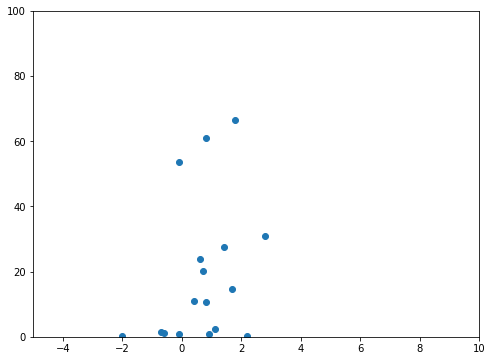

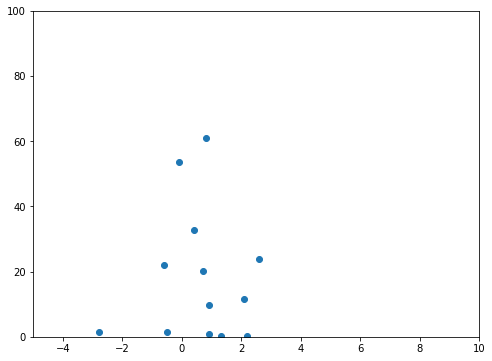

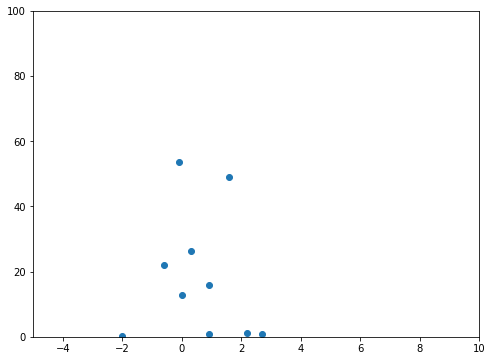

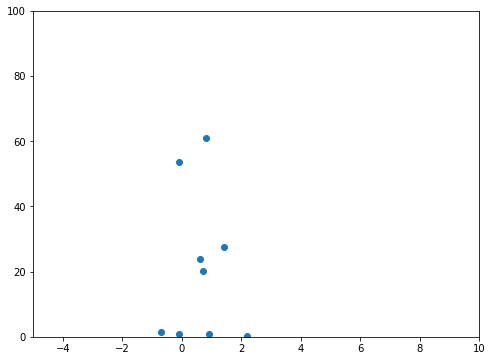

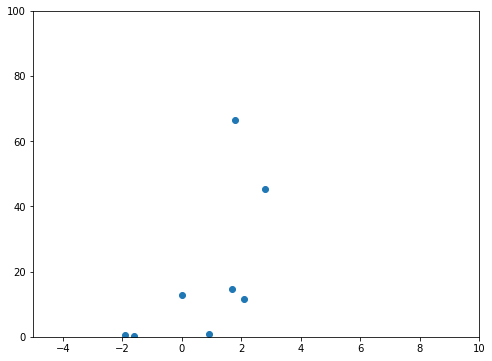

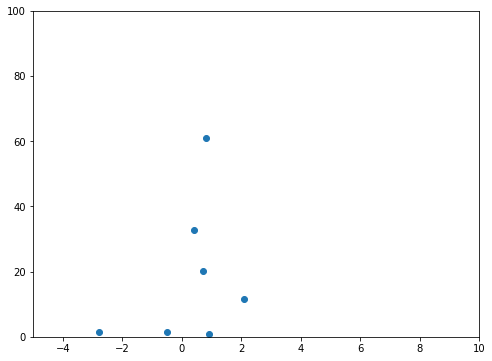

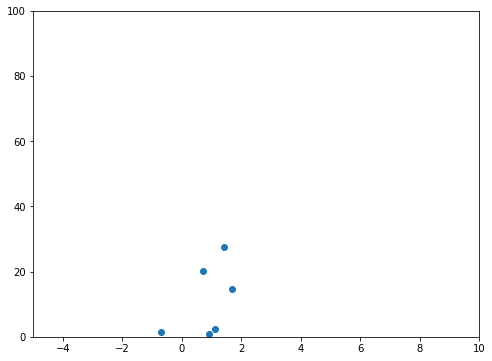

In [77]:
scatter_graph_in_df(df_event_no3_10min, 'Load_Avg_difference', 'hp_Tot(6)',x_range=(-5,10),y_range=(0,100))
scatter_graph_in_df(df_event_no3_20min, 'Load_Avg_difference', 'hp_Tot(6)',x_range=(-5,10),y_range=(0,100))
scatter_graph_in_df(df_event_no3_30min, 'Load_Avg_difference', 'hp_Tot(6)',x_range=(-5,10),y_range=(0,100))
scatter_graph_in_df(df_event_no3_40min, 'Load_Avg_difference', 'hp_Tot(6)',x_range=(-5,10),y_range=(0,100))
scatter_graph_in_df(df_event_no3_50min, 'Load_Avg_difference', 'hp_Tot(6)',x_range=(-5,10),y_range=(0,100))
scatter_graph_in_df(df_event_no3_60min, 'Load_Avg_difference', 'hp_Tot(6)',x_range=(-5,10),y_range=(0,100))
scatter_graph_in_df(df_event_no3_70min, 'Load_Avg_difference', 'hp_Tot(6)',x_range=(-5,10),y_range=(0,100))
scatter_graph_in_df(df_event_no3_80min, 'Load_Avg_difference', 'hp_Tot(6)',x_range=(-5,10),y_range=(0,100))
scatter_graph_in_df(df_event_no3_90min, 'Load_Avg_difference', 'hp_Tot(6)',x_range=(-5,10),y_range=(0,100))

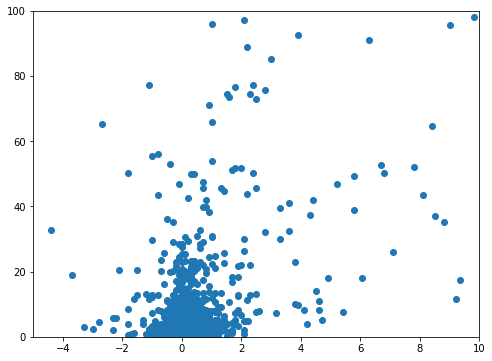

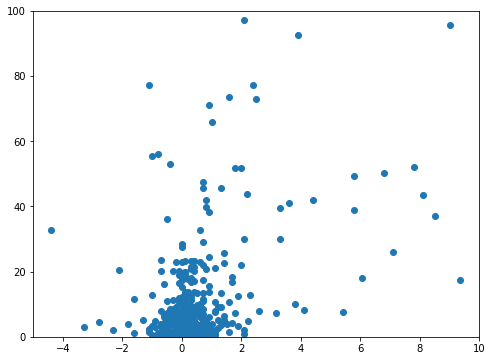

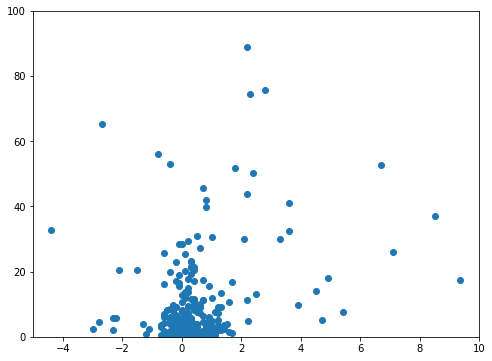

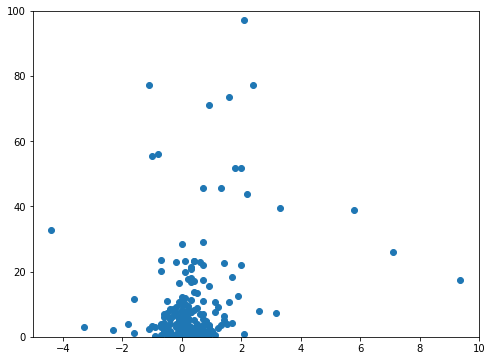

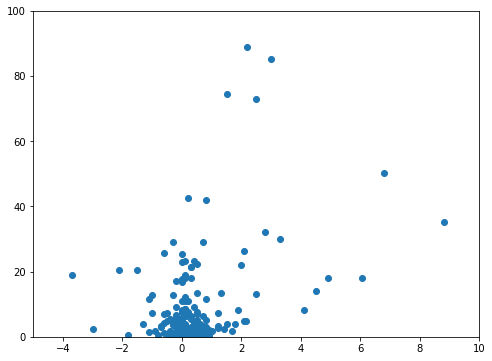

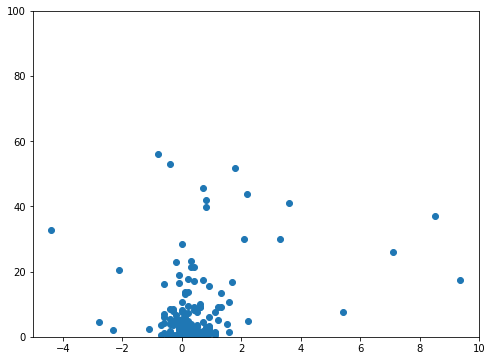

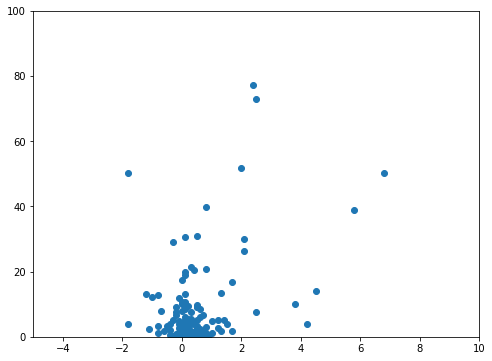

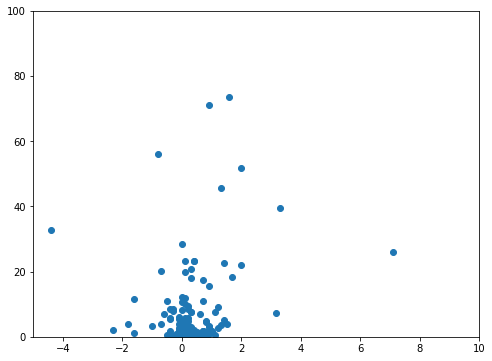

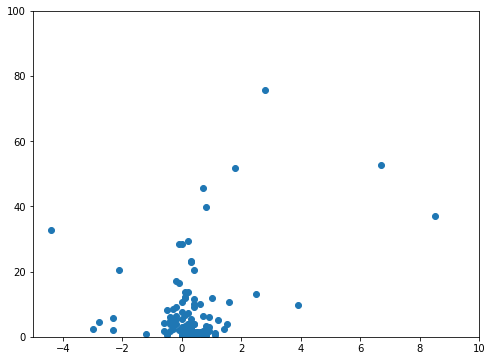

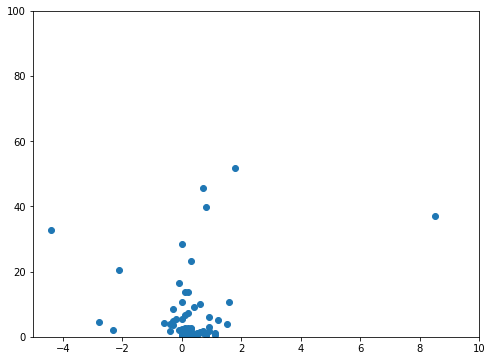

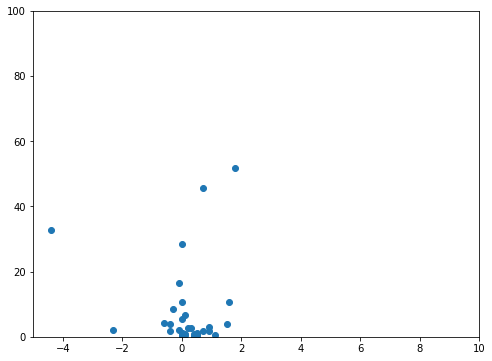

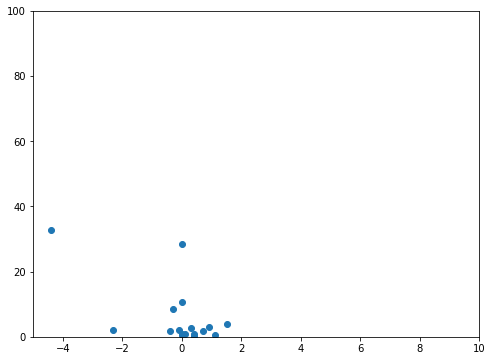

In [81]:
scatter_graph_in_df(df_event_no4_10min, 'Load_Avg_difference', 'hp_Tot(6)',x_range=(-5,10),y_range=(0,100))
scatter_graph_in_df(df_event_no4_20min, 'Load_Avg_difference', 'hp_Tot(6)',x_range=(-5,10),y_range=(0,100))
scatter_graph_in_df(df_event_no4_30min, 'Load_Avg_difference', 'hp_Tot(6)',x_range=(-5,10),y_range=(0,100))
scatter_graph_in_df(df_event_no4_40min, 'Load_Avg_difference', 'hp_Tot(6)',x_range=(-5,10),y_range=(0,100))
scatter_graph_in_df(df_event_no4_50min, 'Load_Avg_difference', 'hp_Tot(6)',x_range=(-5,10),y_range=(0,100))
scatter_graph_in_df(df_event_no4_60min, 'Load_Avg_difference', 'hp_Tot(6)',x_range=(-5,10),y_range=(0,100))
scatter_graph_in_df(df_event_no4_70min, 'Load_Avg_difference', 'hp_Tot(6)',x_range=(-5,10),y_range=(0,100))
scatter_graph_in_df(df_event_no4_80min, 'Load_Avg_difference', 'hp_Tot(6)',x_range=(-5,10),y_range=(0,100))
scatter_graph_in_df(df_event_no4_90min, 'Load_Avg_difference', 'hp_Tot(6)',x_range=(-5,10),y_range=(0,100))
scatter_graph_in_df(df_event_no4_180min, 'Load_Avg_difference', 'hp_Tot(6)',x_range=(-5,10),y_range=(0,100))
scatter_graph_in_df(df_event_no4_360min, 'Load_Avg_difference', 'hp_Tot(6)',x_range=(-5,10),y_range=(0,100))
scatter_graph_in_df(df_event_no4_720min, 'Load_Avg_difference', 'hp_Tot(6)',x_range=(-5,10),y_range=(0,100))

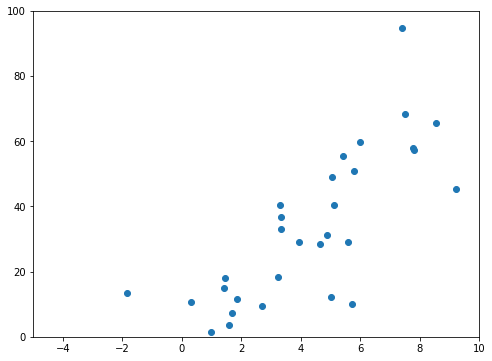

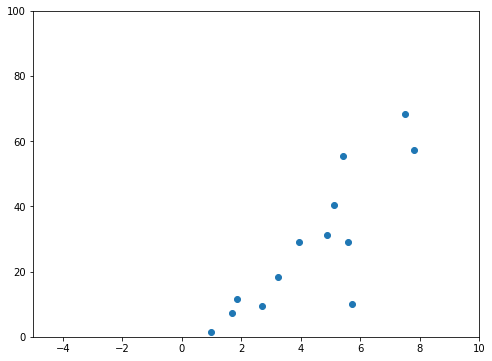

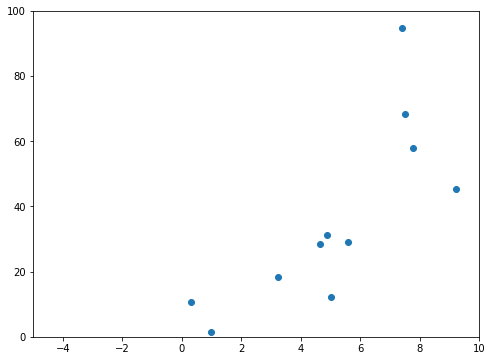

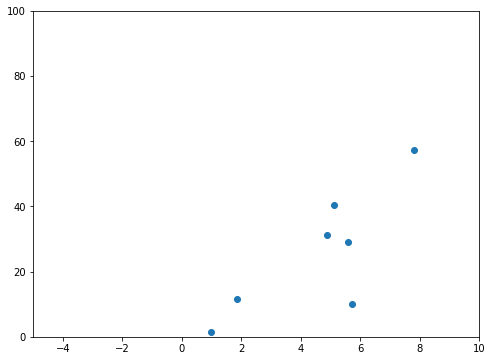

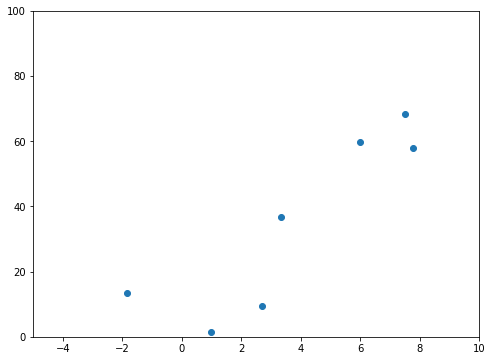

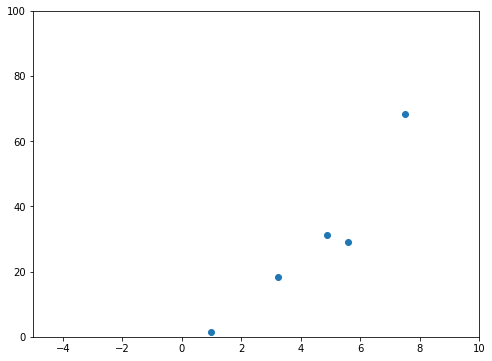

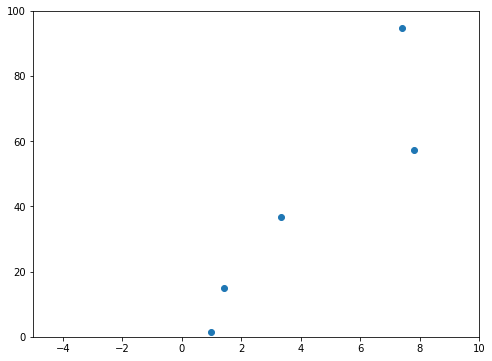

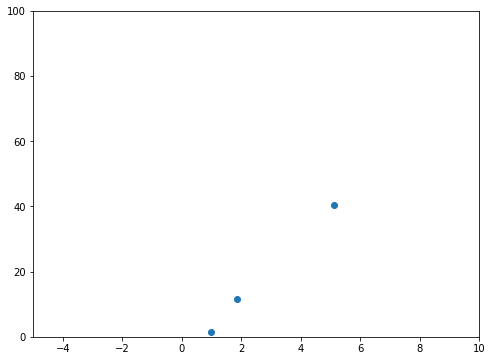

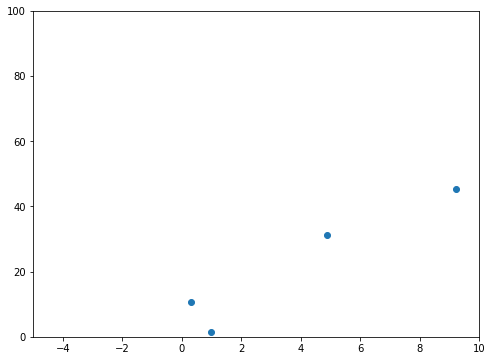

In [82]:
scatter_graph_in_df(df_event_no5_10min, 'Load_Avg_difference', 'hp_Tot(6)',x_range=(-5,10),y_range=(0,100))
scatter_graph_in_df(df_event_no5_20min, 'Load_Avg_difference', 'hp_Tot(6)',x_range=(-5,10),y_range=(0,100))
scatter_graph_in_df(df_event_no5_30min, 'Load_Avg_difference', 'hp_Tot(6)',x_range=(-5,10),y_range=(0,100))
scatter_graph_in_df(df_event_no5_40min, 'Load_Avg_difference', 'hp_Tot(6)',x_range=(-5,10),y_range=(0,100))
scatter_graph_in_df(df_event_no5_50min, 'Load_Avg_difference', 'hp_Tot(6)',x_range=(-5,10),y_range=(0,100))
scatter_graph_in_df(df_event_no5_60min, 'Load_Avg_difference', 'hp_Tot(6)',x_range=(-5,10),y_range=(0,100))
scatter_graph_in_df(df_event_no5_70min, 'Load_Avg_difference', 'hp_Tot(6)',x_range=(-5,10),y_range=(0,100))
scatter_graph_in_df(df_event_no5_80min, 'Load_Avg_difference', 'hp_Tot(6)',x_range=(-5,10),y_range=(0,100))
scatter_graph_in_df(df_event_no5_90min, 'Load_Avg_difference', 'hp_Tot(6)',x_range=(-5,10),y_range=(0,100))